<a href="https://www.kaggle.com/code/aleksandrmorozov123/time-series-forecasting?scriptVersionId=158479699" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv
/kaggle/input/nifty50-stock-market-data/GRASIM.csv
/kaggle/input/nifty50-stock-market-data/WIPRO.csv
/kaggle/input/nifty50-stock-market-data/stock_metadata.csv
/kaggle/input/nifty50-stock-market-data/BPCL.csv
/kaggle/input/nifty50-stock-market-data/INFY.csv
/kaggle/input/nifty50-stock-market-data/LT.csv
/kaggle/input/nifty50-stock-market-data/RELIANCE.csv
/kaggle/input/nifty50-stock-market-data/BRITANNIA.csv
/kaggle/input/nifty50-stock-market-data/INFRATEL.csv
/kaggle/input/nifty50-stock-market-data/HEROMOTOCO.csv
/kaggle/input/nifty50-stock-market-data/HINDUNILVR.csv
/kaggle/input/nifty50-stock-market-data/TATAMOTORS.csv
/kaggle/input/nifty50-stock-market-data/MM.csv
/kaggle/input/nifty50-stock-market-data/HDFC.csv
/kaggle/input/nifty50-stock-market-data/JSWSTEEL.csv
/kaggle/input/nifty50-stock-market-data/TITAN.csv
/kaggle/input/nifty50-stock-market-data/HINDALCO.csv
/kaggle/input/nifty50-stock-market-data/AXISBANK.csv
/kaggle/inpu

**Generating synthetic white noise**

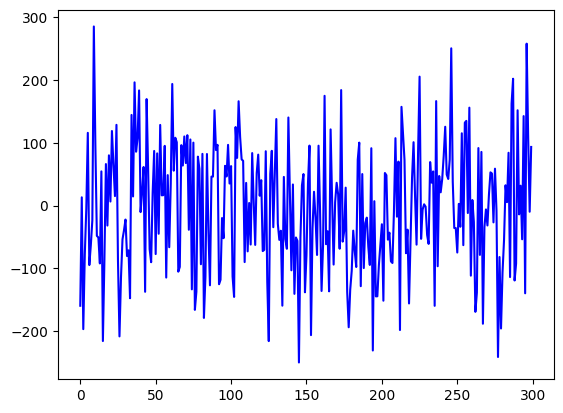

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

time = np.arange (300)
values = np.random.randn (300) * 100

fig, ax = plt.subplots()

ax.plot(time, values, color="blue")

**Red noise** - $ x_{j+1} = r \cdot x_j + (1 - r^2)^{\frac{1}{2}} \cdot w$

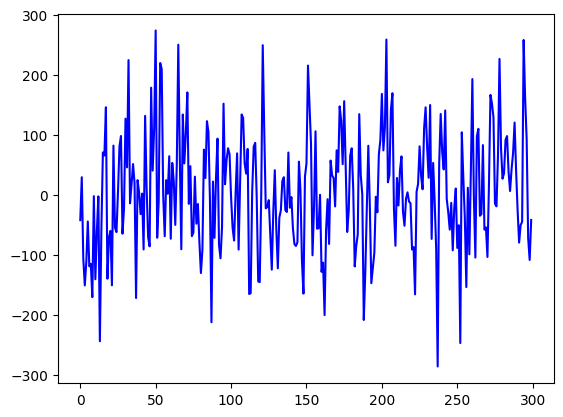

In [3]:
r = 0.4
time = np.arange (300)
white_noise = np.random.randn (300) * 100
values = np.zeros (300)

for i, v in enumerate (white_noise):
    if i == 0:
        values [i] = v
    else:
        values [i] = r*values [i-1] + np.sqrt ((1-np.power (r, 2))) * v

fig, ax = plt.subplots()

ax.plot(time, values, color="blue")

**Create synthetical cyclical time series**

  Cloning https://github.com/TimeSynth/TimeSynth.git to /tmp/pip-req-build-hladg27w
  Running command git clone --filter=blob:none --quiet https://github.com/TimeSynth/TimeSynth.git /tmp/pip-req-build-hladg27w
  Resolved https://github.com/TimeSynth/TimeSynth.git to commit e50cdb9015d415adf46a4eae161a087c5c378564
  Preparing metadata (setup.py) ... - done
  Obtaining dependency information for symengine>=0.4 from https://files.pythonhosted.org/packages/a6/69/97a99ae1835810e0f3f4f471cdfcb6d886be93e4ee5688397deacab955bc/symengine-0.11.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
  Preparing metadata (setup.py) ... - \ | done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 37.8 MB/s eta 0:00:00
  Created wheel for timesynth: filename=timesynth-0.2.4-py3-none-any.whl size=15422 sha256=89ccbaa44be76e27f7a324576a8bc6f3

Text(0.5, 1.0, 'Irregularly sampled sinusoid with noise')

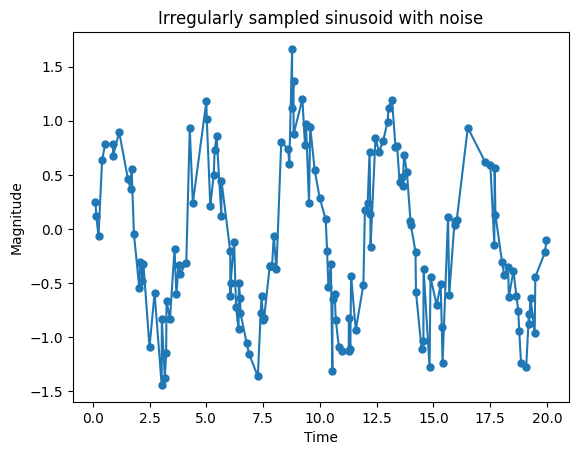

In [4]:
# cite from -  J. R. Maat, A. Malali, and P. Protopapas, 
#“TimeSynth: A Multipurpose Library for Synthetic Time Series in Python,” 2017. 
#[Online]. Available: http://github.com/TimeSynth/TimeSynth
!pip uninstall timesynth --yes
!pip install git+https://github.com/TimeSynth/TimeSynth.git
import timesynth as ts

time_sampler = ts.TimeSampler (stop_time = 20)
irregular_time_samples = time_sampler.sample_irregular_time (num_points = 300,
                                                            keep_percentage = 50)
sinusoid = ts.signals.Sinusoidal (frequency = 0.25)
white_noise = ts.noise.GaussianNoise (std = 0.3)
timeseries = ts.TimeSeries (sinusoid, noise_generator = white_noise)
samples, signals, errors = timeseries.sample (irregular_time_samples)

plt.plot (irregular_time_samples, samples, marker = "o", markersize = 5)
plt.xlabel ("Time")
plt.ylabel ("Magnitude")
plt.title ("Irregularly sampled sinusoid with noise")

**Preparing a real dataset**

In [5]:
import pandas as pd
series = pd.read_csv ('/kaggle/input/nifty50-stock-market-data/NIFTY50_all.csv', header = 0, index_col = 0)
print (type (series))
print (series.head ())

<class 'pandas.core.frame.DataFrame'>
                Symbol Series  Prev Close    Open     High    Low   Last  \
Date                                                                       
2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

             Close    VWAP    Volume      Turnover  Trades  \
Date                                                         
2007-11-27  962.90  984.72  27294366  2.687719e+15     NaN   
2007-11-28  893.90  941.38   4581338  4.312765e+14     NaN   
2007-11-29  884.20  888.09   5124121  4.550658e+14     NaN   
2007-11-30  921.55  929.17   4609762  4.283257e+14     NaN   
2007-12-03  969.30  965.65   2977470  2.875200e+14     Na

In [6]:
series.describe ()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.00000,2.351920e+05,2.351920e+05,1.203440e+05,2.191150e+05,219115.000000
mean,1266.196349,1267.759708,1286.581440,1247.488465,1266.388302,1266.554351,1267.13230,3.045903e+06,1.610138e+14,6.196427e+04,1.315098e+06,0.502997
std,2581.370320,2585.259609,2619.649216,2546.621396,2581.392543,2582.140942,2582.69998,7.333981e+06,3.298085e+14,6.866457e+04,2.831670e+06,0.190019
min,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.21000,3.000000e+00,1.047000e+07,1.100000e+01,5.000000e+00,0.023600
25%,274.300000,275.000000,279.500000,269.600000,274.400000,274.350000,274.69750,2.190095e+05,1.612816e+13,2.183400e+04,1.253830e+05,0.364700
50%,566.500000,567.025000,576.900000,556.500000,567.000000,566.700000,566.94000,1.010938e+06,6.832603e+13,4.406800e+04,5.017560e+05,0.511000
75%,1242.200000,1243.312500,1263.000000,1221.650000,1242.900000,1242.400000,1242.66250,3.019851e+06,1.863835e+14,7.893550e+04,1.452233e+06,0.638400
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.24000,4.810589e+08,3.564334e+16,1.643015e+06,2.325307e+08,1.000000


In [7]:
series.isnull().sum().sum()

147002

In [8]:
series.isnull ().values.any ()

True